<p>

<p>

<h1>Exploratory Data Analysis of the data set of <i>"Students Exam Scores: Extended Dataset"</i> </h1>

<b> Importing libraries

<p>

In [75]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as plt
import seaborn as sns

<p>

<b>Reading the Dataset

<p>

In [2]:
df=pd.read_csv('student.csv')
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,10-May,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,10-May,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,10-May,76,78,75


<p>

<b>Checking if there's any null values column by column

<p>

In [3]:
for column in df.notnull().columns.values.tolist():
    print(column)
    print (df.notnull()[column].value_counts())
    print('')

Unnamed: 0
True    30641
Name: Unnamed: 0, dtype: int64

Gender
True    30641
Name: Gender, dtype: int64

EthnicGroup
True     28801
False     1840
Name: EthnicGroup, dtype: int64

ParentEduc
True     28796
False     1845
Name: ParentEduc, dtype: int64

LunchType
True    30641
Name: LunchType, dtype: int64

TestPrep
True     28811
False     1830
Name: TestPrep, dtype: int64

ParentMaritalStatus
True     29451
False     1190
Name: ParentMaritalStatus, dtype: int64

PracticeSport
True     30010
False      631
Name: PracticeSport, dtype: int64

IsFirstChild
True     29737
False      904
Name: IsFirstChild, dtype: int64

NrSiblings
True     29069
False     1572
Name: NrSiblings, dtype: int64

TransportMeans
True     27507
False     3134
Name: TransportMeans, dtype: int64

WklyStudyHours
True     29686
False      955
Name: WklyStudyHours, dtype: int64

MathScore
True    30641
Name: MathScore, dtype: int64

ReadingScore
True    30641
Name: ReadingScore, dtype: int64

WritingScore
True    306

<p>

<b>Checking the information about the columns

<p>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


<p>

<b>Making a list of the columns that has null value

<p>

In [14]:
null_cols = df.loc[:, df.isnull().any()]
listof_null_columns=list(null_cols.columns)
listof_null_columns

[]

<p>

<b>Making a list of column that has null value and data is <i>'object'

<p>

In [13]:
null_cols = df.select_dtypes(include='object').loc[:, df.isnull().any()]
listof_null_columns_obj = list(null_cols.columns)
listof_null_columns_obj

[]

<p>

<b>Filling the value of null value for data type object</b><br>
As it is a catagorical value we can't really calculate mean so we will find out the frequency and replace the null value with it

<p>

In [89]:
for col in listof_null_columns_obj:
    freq=df[col].value_counts().idxmax()
    df[col].fillna(freq, inplace=True)

<p>

<b>Making a list of column that has null value and data is <i>'int64'

<p>

In [8]:
null_cols = df.select_dtypes(include='int64').loc[:, df.isnull().any()]
listof_null_columns_int = list(null_cols.columns)
listof_null_columns_int

[]

<p>

<b>Making a list of column that has null value and data is <i>'float64'

<p>

In [16]:
null_cols = df.select_dtypes(include='float64').loc[:, df.isnull().any()]
listof_null_columns_float = list(null_cols.columns)
listof_null_columns_float

[]

<p>

<b>Filling the null value of the column that has datatype <i>'float64'</i> with it's mean</b>
   

<p>

In [15]:
avg_val = df['NrSiblings'].mean(axis=0)
df['NrSiblings'].fillna(round(avg_val), inplace=True)

<p>

<b>Describing the basic statistics of the dataset parameter <i> "include='all'" </i> includes the variables that not a numerical variable

<p>

In [19]:
df.describe(include='all')

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
count,30641.000000,30641,30641,30641,30641,30641,30641,30641,30641,30641.000000,30641,30641,30641.000000,30641.000000,30641.000000
unique,NaN,2,5,6,2,2,4,3,2,NaN,2,3,NaN,NaN,NaN
top,NaN,female,group C,some college,standard,none,married,sometimes,yes,NaN,school_bus,10-May,NaN,NaN,NaN
freq,NaN,15424,11052,8478,19905,20686,18034,15844,19986,NaN,19279,17201,NaN,NaN,NaN
mean,499.556607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.138409,NaN,NaN,66.558402,69.377533,68.418622
std,288.747894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.420707,NaN,NaN,15.361616,14.758952,15.443525
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,10.000000,4.000000
25%,249.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,56.000000,59.000000,58.000000
50%,500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,67.000000,70.000000,69.000000
75%,750.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,78.000000,80.000000,79.000000


<p>

Done with empty values....

<p>

<b>Just some small calculation

<p>

In [25]:
df['WklyStudyHours'].value_counts()

5-10    17201
< 5      8238
> 10     5202
Name: WklyStudyHours, dtype: int64

<b>Fixing the wrong format of data

<p>

In [24]:
df['WklyStudyHours'].replace("10-May", '5-10',inplace=True)
df['WklyStudyHours']

0         < 5
1        5-10
2         < 5
3        5-10
4        5-10
         ... 
30636    5-10
30637    5-10
30638    5-10
30639    5-10
30640    5-10
Name: WklyStudyHours, Length: 30641, dtype: object

<b>Checking the correlation between numerical variable

<p>

In [36]:
co_re=df.corr()
co_re.iloc[1:,1:]

C:\Users\Digital Outlet\AppData\Local\Temp\ipykernel_8860\3092024657.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  co_re=df.corr()


,NrSiblings,MathScore,ReadingScore,WritingScore
NrSiblings,1.000000,-0.001084,-0.000796,-0.002375
MathScore,-0.001084,1.000000,0.817825,0.807118
ReadingScore,-0.000796,0.817825,1.000000,0.952584
WritingScore,-0.002375,0.807118,0.952584,1.000000


<b>Printing the columns of the data set

<p>

In [38]:
df.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')

<b>Drawing the scattar plot with regration line

<b>

(0.0, 104.5)

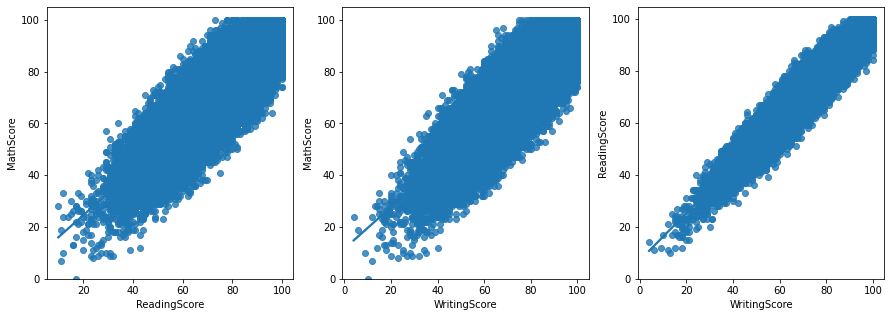

In [79]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.regplot(x="ReadingScore", y="MathScore", data=df, ax=axes[0])
axes[0].set_ylim(0,)

sns.regplot(x="WritingScore", y="MathScore", data=df, ax=axes[1])
axes[1].set_ylim(0,)

sns.regplot(x="WritingScore", y="ReadingScore", data=df, ax=axes[2])
axes[2].set_ylim(0,)

<h5> Thought </h5>
<p>
As we can see in plot the relation between variables are perfectly correlated. The regression line intersets most of the data points. 

</p>

<b>
    

Text(0, 0.5, 'Score')

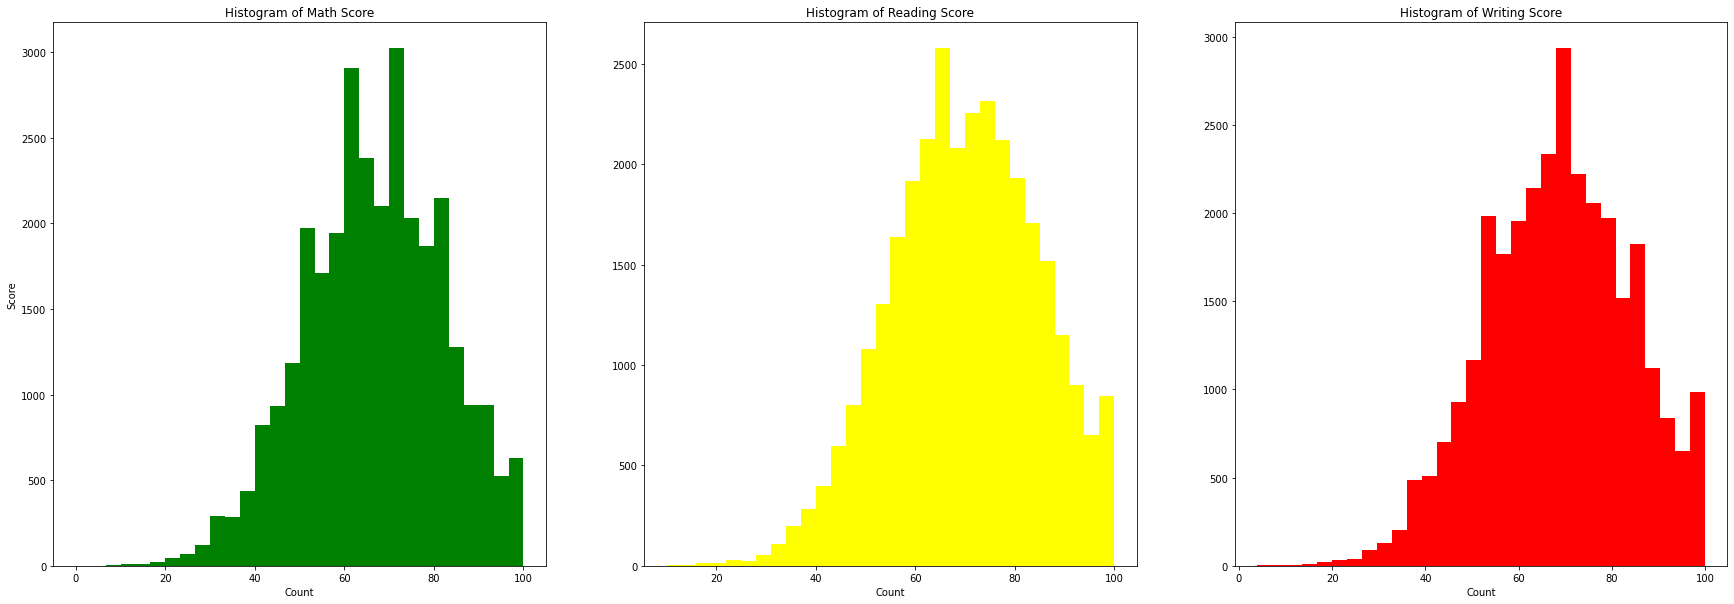

In [84]:
# Generate some sample data
data1 = df["MathScore"]
data2 = df["ReadingScore"]
data3 = df["WritingScore"]

# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(30, 10))

# Plot the histograms on each subplot
axs[0].hist(data1, bins=30,color='Green')
axs[1].hist(data2, bins=30,color="Yellow")
axs[2].hist(data3, bins=30,color="Red")

# Set titles and labels
axs[0].set_title('Histogram of Math Score')
axs[1].set_title('Histogram of Reading Score')
axs[2].set_title('Histogram of Writing Score')
axs[0].set_xlabel('Count')
axs[1].set_xlabel('Count')
axs[2].set_xlabel('Count')
axs[0].set_ylabel('Score')

<b>

<b>

In [90]:
df_male= df[df['Gender']=='male']
df_male[['Gender']]

,Gender
3,male
4,male
7,male
8,male
10,male
...,...
30631,male
30634,male
30635,male
30637,male


In [85]:
df_female= df[df['Gender']=='female']
df_female[['Gender']]

,Gender
0,female
1,female
2,female
5,female
6,female
...,...
30632,female
30633,female
30636,female
30638,female
